# Information about the first Brillouin zone for generalized triangle lattice

## Translation vectors of real space

- $\mathbf{a}_0 = (1, 0)$
- $\mathbf{a}_1 = (\frac{1}{2}, \frac{\sqrt{3}}{2})$

## Translation vectors of reciprocal space

- $\mathbf{b}_0 = (2\pi, -\frac{2\pi}{\sqrt{3}})$
- $\mathbf{b}_1 = (0, \frac{4\pi}{\sqrt{3}})$

## $\Gamma$ point

- $\Gamma = (0, 0)$

## M points

- $M_0 = (-\pi, \frac{\pi}{\sqrt{3}})$
- $M_1 = (0, \frac{2\pi}{\sqrt{3}})$
- $M_2 = (\pi, \frac{\pi}{\sqrt{3}})$
- $M_3 = (\pi, -\frac{\pi}{\sqrt{3}})$
- $M_4 = (0, -\frac{2\pi}{\sqrt{3}})$
- $M_5 = (-\pi, -\frac{\pi}{\sqrt{3}})$

## K points

- $K_0 = (-\frac{4\pi}{3}, 0)$
- $K_1 = (-\frac{2\pi}{3}, \frac{2\pi}{\sqrt{3}})$
- $K_2 = (\frac{2\pi}{3}, \frac{2\pi}{\sqrt{3}})$
- $K_3 = (\frac{4\pi}{3}, 0)$
- $K_4 = (\frac{2\pi}{3}, -\frac{2\pi}{\sqrt{3}})$
- $K_5 = (-\frac{2\pi}{3}, -\frac{2\pi}{\sqrt{3}})$

In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

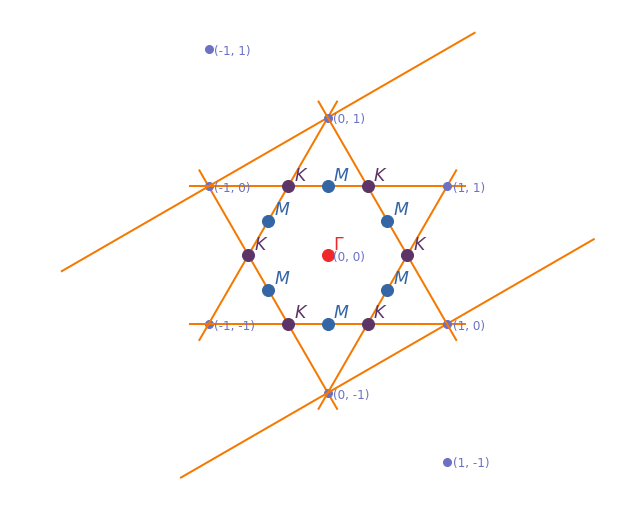

In [2]:
dx = dy = 0.3

dtype = np.float64

# Translation vectors of real space and reciprocal space
As = np.array([[1.0, 0.0], [0.5, np.sqrt(3)/2]], dtype=dtype)
Bs = 2 * np.pi * np.array([[1.0, -1/np.sqrt(3)], [0.0, 2/np.sqrt(3)]], dtype=dtype)

# Some high symmetry points in the first Brillouin zone
Gamma = np.array([0.0, 0.0], dtype=dtype)

Ks = 2 * np.pi * np.array(
    [[-2/3.0, 0.0], [-1/3.0, 1/np.sqrt(3)], [1/3.0, 1/np.sqrt(3)],
     [2/3.0, 0.0], [1/3.0, -1/np.sqrt(3)], [-1/3.0, -1/np.sqrt(3)]],
    dtype=dtype
)

Ms = np.pi * np.array(
    [[-1.0, 1/np.sqrt(3)], [0.0, 2/np.sqrt(3)], [1.0, 1/np.sqrt(3)],
     [1.0, -1/np.sqrt(3)], [0.0, -2/np.sqrt(3)], [-1.0, -1/np.sqrt(3)]],
    dtype=dtype
)

fig, ax = plt.subplots()
fig.set_size_inches(w=16, h=9)
ax.set_aspect("equal")
ax.set_axis_off()

# Draw the boundary of the first Brillouin zone
color0 = "#6C71C4"
color1 = "#F57900"
for config in product(range(-1, 2), repeat=2):
    K = np.matmul(config, Bs)
    ax.plot(K[0], K[1], marker="o", mec=color0, mfc=color0, markersize=8)
    ax.text(K[0]+dx, K[1]-dy, str(config), size="large", color=color0)
    if config != (0, 0):
        center = K / 2
        orthogonal_vector = np.array([-K[1], K[0]])
        p0 = center + orthogonal_vector
        p1 = center - orthogonal_vector
        ax.plot((p0[0], p1[0]), (p0[1], p1[1]), color=color1, lw=2)

size = "xx-large"
# Draw the Gamma point
color = "#EF2929"
ax.plot(Gamma[0], Gamma[1], marker='o', mec=color, mfc=color, markersize=12)
ax.text(
    Gamma[0]+dx, Gamma[1]+dy, s=r"$\mathit{\Gamma}$",
    size=size, color=color
)

# Draw the M points
color = "#3465A4"
for x, y in Ms:
    ax.plot(x, y, marker='o', mec=color, mfc=color, markersize=12)
    ax.text(x+dx, y+dy, s=r"$\mathit{M}$", size=size, color=color)

# Draw the K points
color= "#5C3566"
for x, y in Ks:
    ax.plot(x, y, marker='o', mec=color, mfc=color, markersize=12)
    ax.text(x+dx, y+dy, s=r"$\mathit{K}$", size=size, color=color)

plt.show()